In [1]:
# Imports for my Code

#EDA
import pandas as pd
import numpy as np

#graphing
import matplotlib.pyplot as plt
import seaborn as sns
import umap
%matplotlib inline

#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score 

#NLP Preprocessing 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
import itertools
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string


#Pipeline Preprossing 
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


#Vectorizing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Modeling
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost 
from xgboost import XGBClassifier

#Model Assessment
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Get rid of warning
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nathanielgreen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathanielgreen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nathanielgreen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nathanielgreen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nathanielgreen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Model For Classifying Text By Grade Level
### By Nathaniel Green

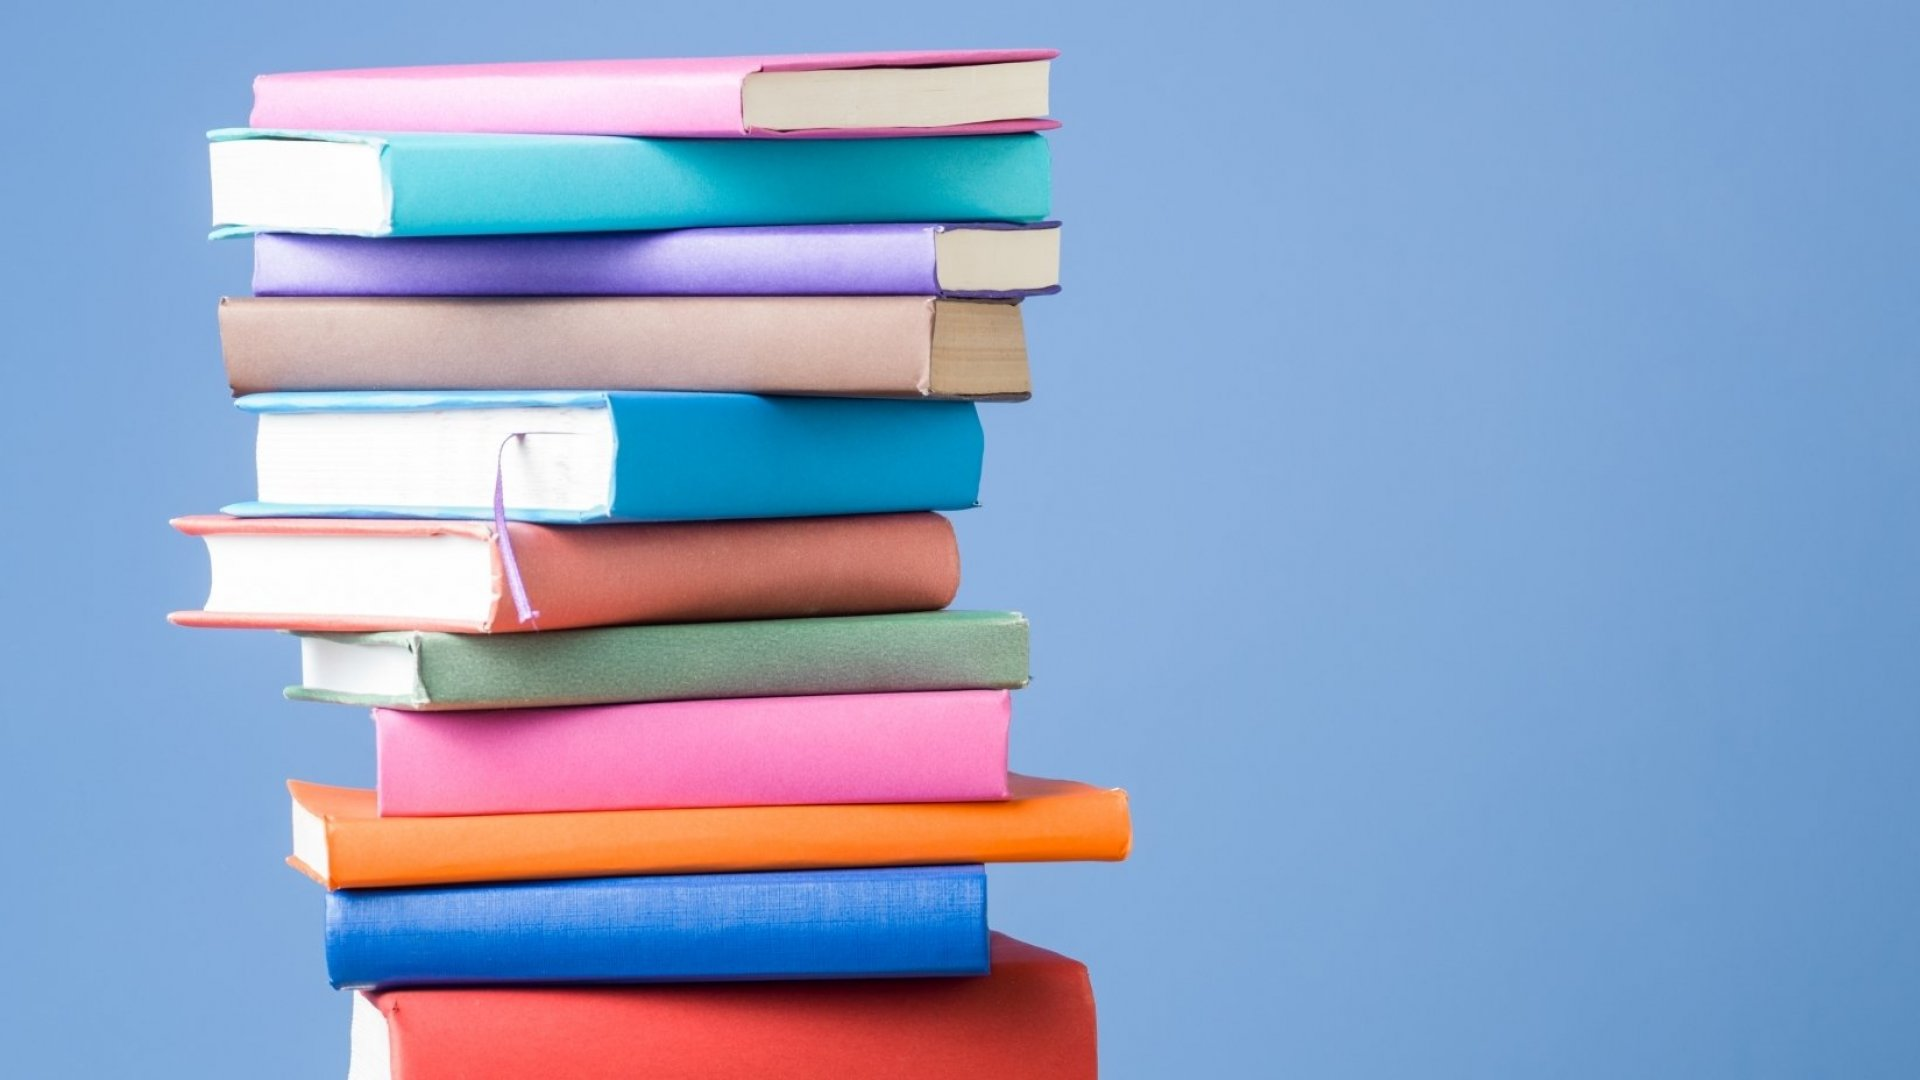

### The Problem

Teachers, especially science and social studies teachers, are always looking for timely, grade appropriate texts for their students. Assessing the academic rigor and readability of a text can be a difficult task for teachers, despite being absolutely essential for student learning and engagement. While expensive sites like NEWSELA exist, their text corporas are often limited in their scope.

The model presented below gives teachers the opportunity to easily assess the readability of novel texts. The model will help support teachers in selecting the most grade appropriate reading for their class. In addition, the model can also be used by teachers in ICT classroom setting to differentiate novel texts for a diverse spectrum of learners. 

### Importing Data

I only used one data set to train my model. The data set I used is a text corpora that was created by Scott Crossley and his of research team at Georgia State University. Below I imported the text corpus and completed EDA on the corpus.

In [2]:
#loading data
XLS = pd.ExcelFile("corpus.xlsx")
corpus = pd.read_excel(XLS, "Data")
corpus.head()

,ID,Author,Title,Anthology,URL,Pub Year,Categ,Sub Cat,Lexile Band,Location,...,BT_easiness,s.e.,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CML2RI
0,400,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,1914.0,Lit,NaN,900,mid,...,-0.340259,0.464009,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,12.097815
1,401,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,1917.0,Lit,NaN,700,mid,...,-0.315372,0.480805,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,22.550179
2,402,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,1917.0,Lit,NaN,900,mid,...,-0.580118,0.476676,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,18.125279
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,1863.0,Lit,NaN,1300,mid,...,-1.785965,0.526599,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,10.959460
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,1889.0,Lit,NaN,1300,mid,...,-1.054013,0.450007,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,3.195960


### Exploratory Data Analysis
Below I used pandas methods to explore the data set in order to answer the following questions about my data:

1. How large is the corpora
2. Are there any missing values in the corpora?
3. What is the range of years in which the texts were published?
4. Where did Georgia State University get the texts for this corpus?



In [3]:
# looking at the size and null value in the corpus
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Author                              4724 non-null   object 
 2   Title                               4724 non-null   object 
 3   Anthology                           2712 non-null   object 
 4   URL                                 4716 non-null   object 
 5   Pub Year                            4715 non-null   float64
 6   Categ                               4724 non-null   object 
 7   Sub Cat                             585 non-null    object 
 8   Lexile Band                         4724 non-null   object 
 9   Location                            4724 non-null   object 
 10  License                             1405 non-null   object 
 11  MPAA Max                            4724 no

The information chart above shows that the corpus has 4724 rows with float, integer and object data types. While not huge, 4724 texts seems like enough data to appropriately trian my model. In addition, a few of the columns such as Anthology, Sub Cat, and License have null values. I am not concerned about the null values in theses columns because I do not needs these columns in order to create my model.

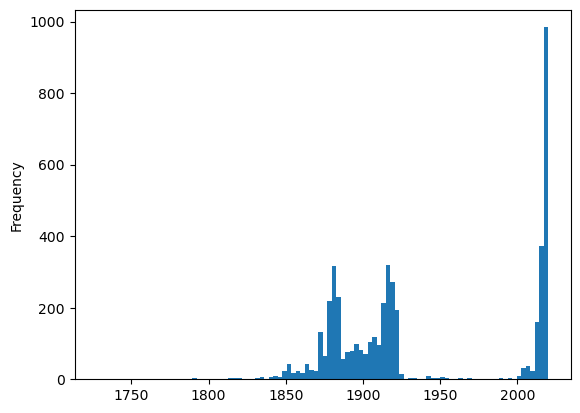

In [4]:
#Distribution of publication dates
corpus["Pub Year"].plot(kind = "hist", bins = 100);

Looking at the histogram above we can see that the publication dates occur in two tight clusters. These clusters of dates show that the majority of texts in my corpus were published either between 1850-1922 and 2010-2022. I believe that these clusters occur because most of texts are public domain texts or texts taken from sites like wikipedia.

In addition, the fact that a large number of the texts were published over 100 years ago creates a problem for my model. I was hoping that my model could be used to assess the readability of newer, novel texts. By training my model using a corpus that is so heavily skewed to older texts, my model may not be good at assessing the readability of newer texts.

Now that we have looked at the histogram of publication years, let's look at the authors who who, created the texts in my corpus:

In [5]:
corpus['Author'].value_counts()

simple wiki                              275
wikipedia                                274
?                                        271
USHistory.org                             28
CommonLit Staff                           16
                                        ... 
Tessa Welch                                1
Sudhir                                     1
Sayed Ashique Mahmood                      1
Samantha Cutler, Thea Nicole de Klerk      1
Austro-Hungarian statesman                 1
Name: Author, Length: 2409, dtype: int64

In [51]:
list(corpus['Author'].unique())

['Carolyn Wells',
 'CHARLES KINGSLEY',
 'Charles Kingsley',
 'Charles Madison Curry\n        Erle Elsworth Clippinger',
 'Clair W. Hayes',
 'Claude A. Labelle',
 'Cornelius Mathews',
 'Cyrus Townsend Brady',
 'Dorothy Canfield',
 'E. Nesbit',
 'Edith Bancroft',
 'Edith Van Dyne',
 'Edith van Dyne',
 'Edmund Leamy',
 'Edward Sylvester Ellis',
 'Edward Sylvester Ellis AKA Lieut. R. H. Jayne',
 'Edwin L. Sabin',
 'Elsie Spicer Eells',
 'Emma Leslie',
 'Emma Speed Sampson',
 'Flora Annie Steel',
 'FLORENCE HOLBROOK',
 'Frances Hodgson Burnett',
 'FRANCIS ROLT-WHEELER',
 'FRANK FOWLER',
 'Frank R. Stockton',
 'G. Harvey Ralphson',
 'Gabrielle E. Jackson',
 'George Durston',
 'George MacDonald',
 'George W. Peck',
 'Gerald Breckenridge',
 'GRACE BROOKS HILL',
 'Mabel C. Hawley',
 'Mabell S. C. Smith',
 'Margaret Penrose',
 'Margaret Penrose\n',
 'Margaret Sidney',
 'Margaret Vandercook',
 'Margaret Waters',
 'Margery Williams',
 'Mark Overton',
 'Marmaduke Park',
 'Martha Finley',
 'Mary  Ma

The value counts above shows that many of the texts were scraped from websites like wikipedia and USHistory.org. This is good for my model because looking at the list of authors above, many of the texts are from edcuational websites. Training my model on educational texts will probably improve my model's ability to accuraletly categorize novel educational texts.

In addition, 271 of the texts in this corpus are have unknown authors. For these values, the author is a question mark. Let's take a closer look at these texts in order to decide whether or not these rows should be taken out of the corpus.

In [6]:
#Creating a data frame with only the question mark authors
question_mark = corpus[corpus['Author'] == '?']
question_mark.head(20)

,ID,Author,Title,Anthology,URL,Pub Year,Categ,Sub Cat,Lexile Band,Location,...,BT_easiness,s.e.,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CML2RI
191,1159,?,THE PRODIGAL SON.,MOTHER STORIES\n\nFROM THE NEW TESTAMENT,http://www.gutenberg.org/files/17163/17163-h/1...,NaN,Lit,NaN,1100,mid,...,-0.385310,0.477929,80.98,7.80,7.95,6.0,5.70,0.05241,0.10003,16.413332
192,1160,?,DAVID AND GOLIATH.,MOTHER STORIES\n\nFROM THE OLD TESTAMENT\n,http://www.gutenberg.org/files/17162/17162-h/1...,2013.0,Lit,NaN,900,mid,...,-0.202066,0.470274,78.33,6.08,5.99,8.0,6.69,0.11415,0.15040,19.180516
228,1205,?,The Iron Casket,Tales of Wonder Every Child Should Know,http://www.gutenberg.org/files/19461/19461-h/1...,2015.0,Lit,NaN,1100,mid,...,-1.556398,0.478917,74.49,8.46,9.25,9.0,7.30,0.13699,0.15073,11.499357
287,1288,?,CAPTAIN MORGAN AT MARACAIBO,"Journeys Through Bookland, Vol 5",http://www.gutenberg.org/cache/epub/11250/pg11...,1922.0,Info,NaN,1300,mid,...,-0.003119,0.510085,66.40,10.21,12.54,10.0,7.82,0.14392,0.17424,9.996080
288,1289,?,READING HISTORY,"Journeys Through Bookland, Vol 5",http://www.gutenberg.org/cache/epub/11250/pg11...,1909.0,Lit,NaN,1100,mid,...,-0.918314,0.457361,67.99,9.83,10.77,11.0,6.63,0.12312,0.10448,16.460314
1143,2729,?,Three boxes of wealth,African Storybook Level 3,https://www.africanstorybook.org/,2018.0,Lit,NaN,900,mid,...,0.027828,0.472605,77.59,5.76,5.69,8.0,6.34,0.18455,0.20149,27.167069
1847,3575,?,Charter of the United Nations,CLD,https://www.commonlit.org/texts/charter-of-the...,1945.0,Info,NaN,1100,mid,...,-1.044307,0.459514,23.70,18.45,20.33,18.0,11.06,0.25640,0.27240,0.141929
1969,3730,?,Current History Chronicled,"A Monthly Magazine of the New York Times, Volu...",http://www.gutenberg.org/files/41479/41479-h/4...,1918.0,Info,NaN,1100,mid,...,-2.383088,0.509237,47.91,12.60,14.58,14.0,10.46,0.29683,0.27711,4.183286
1970,3731,?,Battles in Picardy and Flanders,"A Monthly Magazine of the New York Times, Volu...",http://www.gutenberg.org/files/41479/41479-h/4...,1918.0,Info,NaN,1300,mid,...,-3.213909,0.543697,47.04,13.16,14.67,14.0,9.68,0.29535,0.31268,4.330503
1971,3733,?,Third Liberty Loan Oversubscribed,"A Monthly Magazine of the New York Times, Volu...",http://www.gutenberg.org/files/41479/41479-h/4...,1918.0,Info,NaN,900,mid,...,-2.071545,0.485334,73.25,6.62,6.91,9.0,7.81,0.22558,0.23072,9.923471


In [7]:
q_list = question_mark["Anthology"].value_counts()
q_list.head(30)

Scientific American Supplement, Nos. 360                                                          21
Scientific American Supplement, No. 388                                                           16
Scientific American Supplement, No. 401                                                           14
SCIENTIFIC AMERICAN SUPPLEMENT NO. 363                                                            12
Scientific American Supplement, No. 385                                                           11
Scientific American Supplement, Nos. 362                                                          11
A Monthly Magazine of the New York Times, Volume 8, No 3                                           9
Scientific American Supplement, No. 303                                                            9
Scientific American Supplement, No. 392                                                            9
Boys and Girls Bookshelf; a Practical Plan of Character Building, Volume I                 

In [8]:
question_mark["Pub Year"].value_counts()

1883.0    61
1882.0    59
1881.0    32
1884.0    15
1873.0    14
1920.0    13
1918.0    12
1898.0    12
1917.0     7
1897.0     7
1922.0     5
1875.0     5
1914.0     4
1905.0     3
1876.0     3
1878.0     3
1896.0     3
1915.0     3
1909.0     2
1886.0     1
2015.0     1
1899.0     1
1877.0     1
1945.0     1
2018.0     1
2013.0     1
Name: Pub Year, dtype: int64

Looking at the texts from unknown authors, most of the texts are from monthly publication where the authors are not specified. With this in mind, I will not drop these rows from my text corpus.

# Normalizing and Tokenizing Text (X - Value)
Now that I have visualed the data I will begin cleaning the text, which is in the column titled "Excerpt." I will clean the text by normalizing and tokenizing the words in the text in order to reduce the number of words in the corpus and prepare the data for NLP.

In [9]:
text = corpus[['Excerpt']]
text.rename(columns = {"Excerpt": "body"}, inplace = True)
text.head()

,body
0,When the young people returned to the ballroom...
1,"All through dinner time, Mrs. Fayre was somewh..."
2,"As Roger had predicted, the snow departed as q..."
3,Mr. Grimes was to come up next morning to Sir ...
4,And outside before the palace a great garden w...


Lookiing at the text above, I need to make all words lowercase, remove punctuation and tokenize the words in each text exercept. 

In [10]:
#Creating list of stop words
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
#Adding punctuation to the stopwords list
punct = string.punctuation
punct
punct_out = punct[6] + punct[11] + punct[14] + punct[22: ]
punct_out = punct_out + "``" + "." + "''"
stop_words += list(punct_out)
print(punct_out)
print(punct)

',/[\]^_`{|}~``.''
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


I decide to keep a few pieces of punctuation like the apostrophe, percetage signs, colons and semi colons because I thought that these pieces of punctuation would help to classify texts by readability. My logic is that more reabable texts will probability have simpler syntax and sentence structure, which means less punctuation.

In [12]:
# Tokenizing function
def first_step_normalizer(doc):
    tokenizer = [x.lower() for x in word_tokenize(doc)]
    norm_text = [x for x in tokenizer if x not in stop_words]
    return norm_text

#Applying tokenizing function and creating a new column for the tokenized text
text["tokenize"] = text["body"].apply(lambda x: first_step_normalizer(x))

In [13]:
#flattening
tokenize_flattened = pd.Series(list(itertools.chain(*text['tokenize'])))
new_dictionary = tokenize_flattened.unique()
print(len(new_dictionary))

38758


38,758 is a lot of words and potential column features. This number will hopefully be reduced after lemmatizing the words

In [14]:
#Looking at value counts for words in the corpus
tokenize_flattened.value_counts()

''            5875
``            5764
;             4121
one           3275
's            3192
              ... 
evincing         1
discoursed       1
it—              1
now—             1
subgroups        1
Length: 38758, dtype: int64

In [15]:
#creating a function to lemmatize words.
def lemm(doc):
    wnl = WordNetLemmatizer()
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
        
    return " ".join(doc_norm)

In [16]:
#creating a new column in the corpus for the fully normalized text
text['fully_normalized'] = text['tokenize'].apply(lambda x: lemm(x))

In [17]:
#Below you can see the text excerpts, the tokenized text and the fully_normalized text
text.head()

,body,tokenize,fully_normalized
0,When the young people returned to the ballroom...,"[young, people, returned, ballroom, presented,...",young people return ballroom present decidedly...
1,"All through dinner time, Mrs. Fayre was somewh...","[dinner, time, mrs., fayre, somewhat, silent, ...",dinner time mrs. fayre somewhat silent eye res...
2,"As Roger had predicted, the snow departed as q...","[roger, predicted, snow, departed, quickly, ca...",roger predict snow departed quickly come day s...
3,Mr. Grimes was to come up next morning to Sir ...,"[mr., grimes, come, next, morning, sir, john, ...",mr. grime come next morning sir john harthover...
4,And outside before the palace a great garden w...,"[outside, palace, great, garden, walled, round...",outside palace great garden wall round fill fu...


### Cleaning Readability Target Value (y - Value)
The corpus includes 11 different measures of readability: Lexile, BT Easiness Score, S.E., Flesch-Reading-Ease, Flesch-Kincaid-Grade-Level, Automated Readability Index, SMOG Readability, New Dale-Chall Readability Formula, CAREC,  CAREC_M, and CML2RI 

I first wanted to create a heatmap of these measures of readability to see how closely correlated all these values are to one another. 

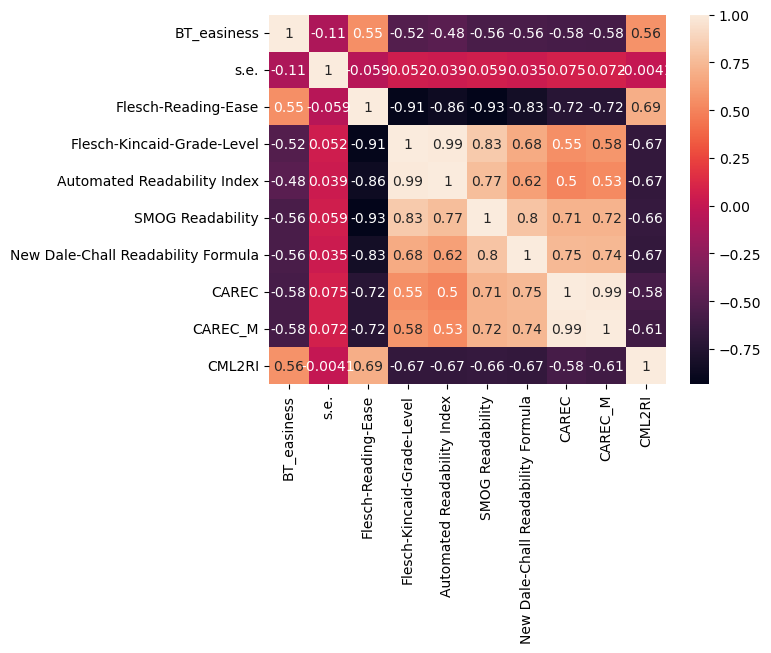

In [18]:
#visualizing correlation bettween different targets
scores_df = corpus[['Lexile Band', 'BT_easiness', "s.e.",'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level', 'Automated Readability Index', 'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CML2RI']]
sns.heatmap(scores_df.corr(), annot = True);

Looking at the heatmap above, I can see that all the measures of readability, the Flesch-Reading-Ease(FRE) score is the most correalted with the other scores. In addition, the FRE score is one of the most commonly used measures of readability along with the Lexile Band Score. 

I will make models using both the FRE Scores and the Lexile Band score in order to decide which target is best.

##### Target 1: Cleaning and Grouping Lexile Bands

In [19]:
#Cleaning Target1 (Lexile Bands)
corpus["Lexile Band"] = corpus["Lexile Band"].replace('410L-600L', 500)
corpus["Lexile Band"] = corpus["Lexile Band"].replace('610L-800L', 700)
corpus["Lexile Band"] = corpus["Lexile Band"].replace('410L - 600L', 500)
corpus["Lexile Band"] = corpus["Lexile Band"].replace('610L - 800L', 700)
corpus["Lexile Band"] = corpus["Lexile Band"].replace('610L-800', 700)
corpus["Lexile Band"].value_counts()

1100    1379
1300    1359
900      815
700      492
500      382
1500     186
1700      58
300       41
1900       9
100        3
Name: Lexile Band, dtype: int64

In [20]:
#map
lex_map = {100:"Elementary",
 300:"Elementary",
 500:"Elementary",
 700: "Elementary",
 900: "Middle",
 1100: "Middle",
 1300: "High",
 1500: "College",
 1700: "College",
 1900: "College"  
}

In [21]:
#regrouping Lexile Bands
corpus["Lexile Regrouped"] = corpus["Lexile Band"].map(lex_map)

In [22]:
corpus["Lexile Regrouped"].value_counts()

Middle        2194
High          1359
Elementary     918
College        253
Name: Lexile Regrouped, dtype: int64

Above, we can see a fairly large class imbalance for the target while using the Lexile Scores. Middle school level texts occur more often in the corpus compared to college and Elementary leveled texts. 

This means that I should consider using a resampling class like smote, randomoversampler, or randomundersampler to address the class imbalance. 

##### Target 2: Cleaning and Grouping FRE Scores

Axes(0.125,0.11;0.775x0.77)


1327    114.03
1328    112.52
3262    111.11
3263    109.82
4419    108.74
         ...  
314      -8.59
695     -14.79
504     -21.33
2057    -25.84
2562    -28.99
Name: Flesch-Reading-Ease, Length: 4724, dtype: float64

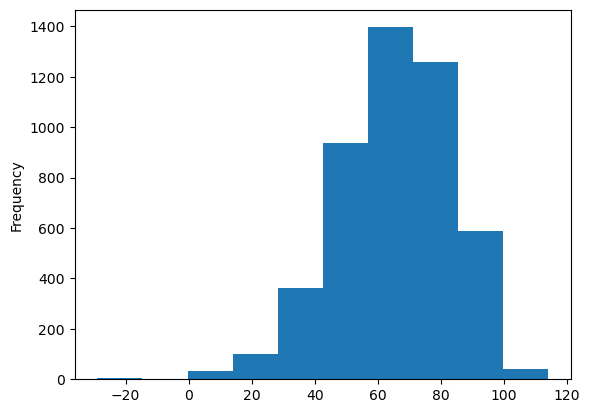

In [23]:
print(corpus['Flesch-Reading-Ease'].plot(kind = "hist"));
corpus['Flesch-Reading-Ease'].sort_values(ascending = False)

In [24]:
bins = [-30, 50, 60, 120]
labels = ["Hard", "Medium", "Easy"]

corpus['FRE_new'] = pd.cut(corpus['Flesch-Reading-Ease'], bins = bins, labels = labels)

corpus['FRE_new'].value_counts()

Easy      2982
Hard       893
Medium     849
Name: FRE_new, dtype: int64

Just like for the Lexile scores, there is a class imbalance in the corpus for FRE scores. The majority of the texts in the corpus are classified as "Easy," which means that I should consider using a resampling technique in the pipeline of my model

### Visualizing our words through a WordCloud
Now that I have my two targets, I just wanted to quickly look at wordclouds of my corpus to see the most common words stratefied by FRE readability scores: Easy, Medium and Hard. 

In [25]:
cloud = pd.concat([text['fully_normalized'], corpus['FRE_new']], axis = 1)

In [26]:
eas = cloud.loc[cloud["FRE_new"] == "Easy"]
med = cloud.loc[cloud["FRE_new"] == "Medium"]
har = cloud.loc[cloud["FRE_new"] == "Hard"]

In [27]:
string_eas = "".join(eas.drop(columns = ["FRE_new"])['fully_normalized'])
string_med = "".join(med.drop(columns = ["FRE_new"])['fully_normalized'])
string_har = "".join(har.drop(columns = ["FRE_new"])['fully_normalized'])
string = "".join(text['fully_normalized'])

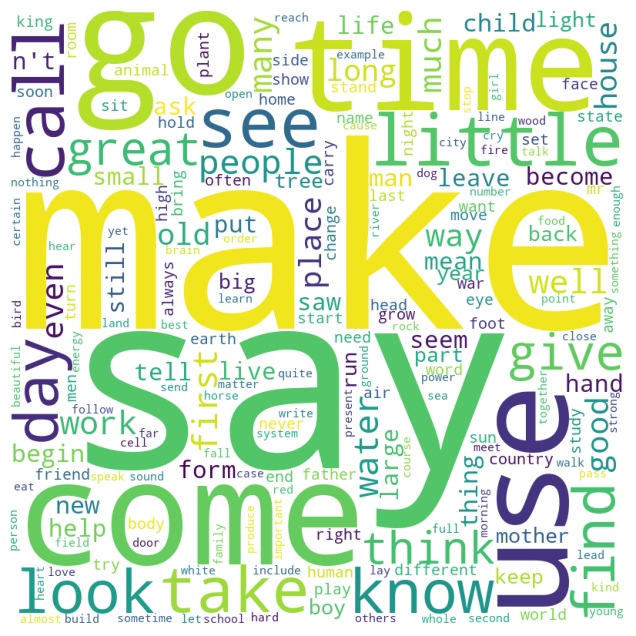

In [28]:
#all words
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(string)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

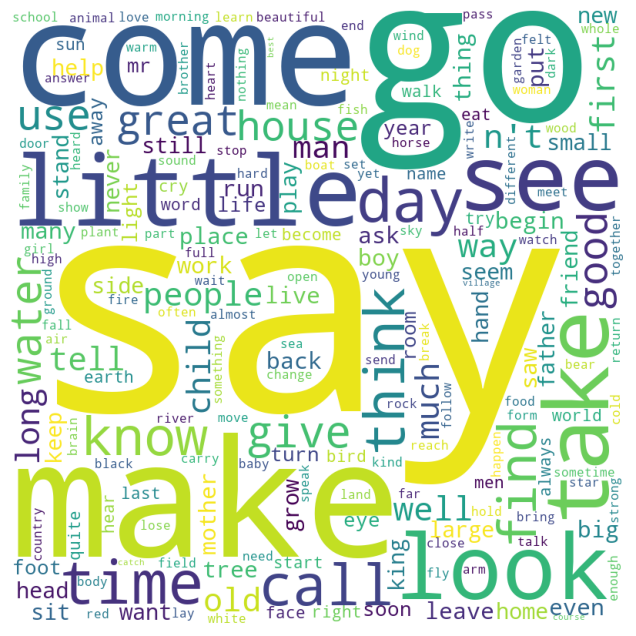

In [29]:
#Easy text
wordcloud_eas = WordCloud(width=800, height=800, background_color='white').generate(string_eas)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_eas)
plt.axis('off')
plt.show()

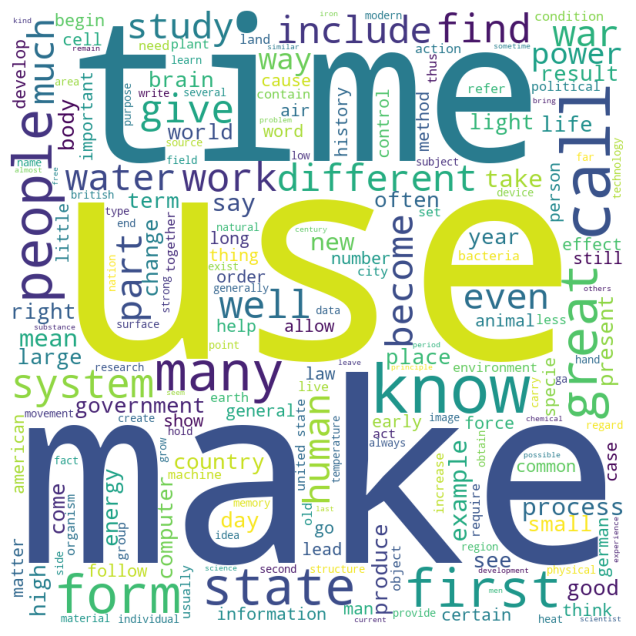

In [30]:
#Hard text
wordcloud_har = WordCloud(width=800, height=800, background_color='white').generate(string_har)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_har)
plt.axis('off')
plt.show()

Above, we can see that the most common words accross the entire corpus, the easy word corpus and the hard word corpus. Looking at the wordcloud, we can see that there is some overlap in the most common words between the hard corpus words and the easy corpus words. Words like "make," "call," and "time" seem to appear frequently in both corpus'. However, upon closer inspection of the the hard word corpus, I can see that more content specific vocabulary in the hard word corpus. The hard word corpus as science vocabulary like lead, organism, and matter. The hard word corpus also has social studies content vocabulary like state, government, and war. This makes sense given that this vocabulary is linked to more advanced high school and college classes. 

### Visualizing Text Levels using a UMAP
In addition to the word map, I also want to visualize my corpus by creating a UMAP

In [31]:
texts = text['fully_normalized']
vect = CountVectorizer(min_df = 0.03, max_df = 0.97)
text_vect = vect.fit_transform(texts)

In [32]:
countvec_df = pd.DataFrame(text_vect.toarray(), columns=vect.get_feature_names_out())


In [33]:
z = corpus['FRE_new']
z = z.apply(lambda x: 0 if x == "Easy" else (1 if x == "Medium" else 2))

In [34]:
clust_df= pd.concat([countvec_df, z], axis=1)
clust_df

,able,age,ago,air,allow,almost,alone,already,also,always,...,wonder,wood,word,work,world,write,year,yet,young,FRE_new
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4720,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clust_df)

In [36]:
embedding.shape

(4724, 2)

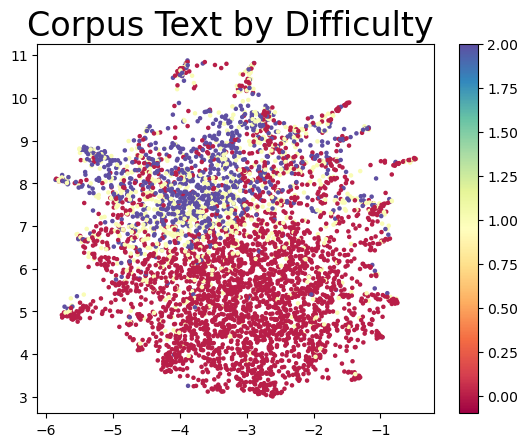

In [37]:
colors = z.values

vmin = colors.min()
vmax = colors.max()

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = colors,
    cmap='Spectral',
    vmin = vmin,
    vmax = vmax,
    s = 5)

plt.colorbar()

plt.title('Corpus Text by Difficulty ', fontsize=24);

The UMAP above reveal a few key characteristics about my data. First, the UMAP shows the class imbalance of my target variable. We can clearly see that the "easy" category of my target variable has significantly more rows of data than the "medium" or "hard" categories. 

In addition, the UMAP above shows me that there is a lot of overlap between the data that is categorized as "easy" and "medium." There is also a lot of overlap between the data categorized as "medium" and "hard." Training my model on this data might not lead to the best results because there is so much overlap between categories. I believe that my model will have an especially hard time categorizing the medium class given all the overlap in data between categories.

### Feature Engineering: Calculating Words Per Sentence
Before I create my categorization model, I will engineer a dataframe feature that I believe will help my model. The first feature I wanted to engineer is the number of words per sentence in each text. I think that this will help my model categorize data because I believe that the texts categorized as "hard" will probably have more words per sentence than those categorized as "easy."

In [38]:
word_count = corpus[['Google WC', 'Sentence Count']]
word_count["WPS"] = corpus['Google WC']/corpus['Sentence Count']

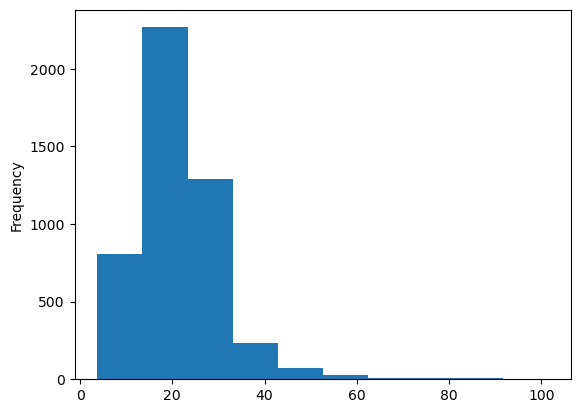

In [39]:
word_count["WPS"].plot(kind = "hist");

In [40]:
WPS = word_count[["WPS"]]
norm = text[['fully_normalized']]

In [41]:
WPS

,WPS
0,15.818182
1,10.933333
2,14.727273
3,53.000000
4,32.600000
...,...
4719,10.058824
4720,10.352941
4721,10.470588
4722,12.333333


In [52]:
text = pd.concat([norm, WPS], axis = 1)


### Test, Train, Split for Target 1

In [57]:
#defining X and Y

X = text
y = corpus["Lexile Regrouped"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Target 1, Model 1
For my first two models I will use ComplementNB() but try two different vecotrizers in my pipeline

In [58]:
#Instantiating Models
vect = TfidfVectorizer()
compnb = ComplementNB()
mm = MinMaxScaler()


#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline = Pipeline(steps = [('ct', ct), ('model', compnb)])
    
pipeline.fit(X_train, y_train)


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numericpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   MinMaxScaler())]),
                                                  ['WPS']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('vectorization',
                                                                   TfidfVectorizer())]),
                                                  'fully_normalized')])),
                ('model', ComplementNB())])

Test Score: 0.5259259259259259
Train Score: 0.7806297962423921
              precision    recall  f1-score   support

     College       0.00      0.00      0.00        51
  Elementary       0.86      0.20      0.32       184
        High       0.44      0.25      0.32       259
      Middle       0.53      0.88      0.66       451

    accuracy                           0.53       945
   macro avg       0.46      0.33      0.32       945
weighted avg       0.54      0.53      0.46       945



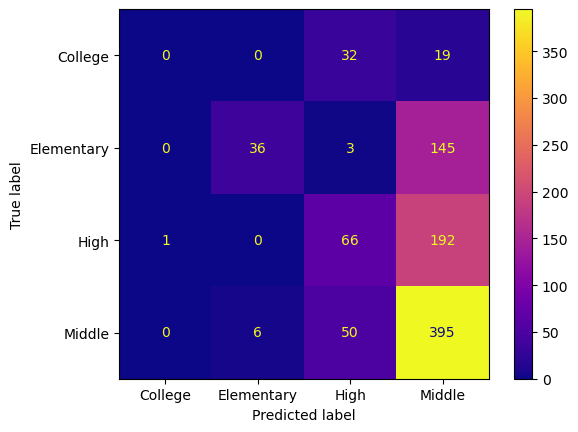

In [59]:
#Predictions
print("Test Score: {}".format(pipeline.score(X_test, y_test)))
print("Train Score: {}".format(pipeline.score(X_train, y_train)))

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap="plasma");

### Target 1, Model 2

In [60]:
vect = CountVectorizer(min_df = 0.03, max_df = 0.97)
compnb = ComplementNB()
mm = MinMaxScaler()


#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline = Pipeline(steps = [('ct', ct), ('model', compnb)])
    
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numericpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   MinMaxScaler())]),
                                                  ['WPS']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('vectorization',
                                                                   CountVectorizer(max_df=0.97,
                                                                                   min_df=0.03))]),
                                                  'fully_normalized')])),
                ('model', ComplementNB())])

Test Score: 0.4095238095238095
Train Score: 0.4948399047367028
              precision    recall  f1-score   support

     College       0.00      0.00      0.00        51
  Elementary       0.37      0.80      0.50       184
        High       0.40      0.57      0.47       259
      Middle       0.54      0.20      0.30       451

    accuracy                           0.41       945
   macro avg       0.33      0.39      0.32       945
weighted avg       0.44      0.41      0.37       945



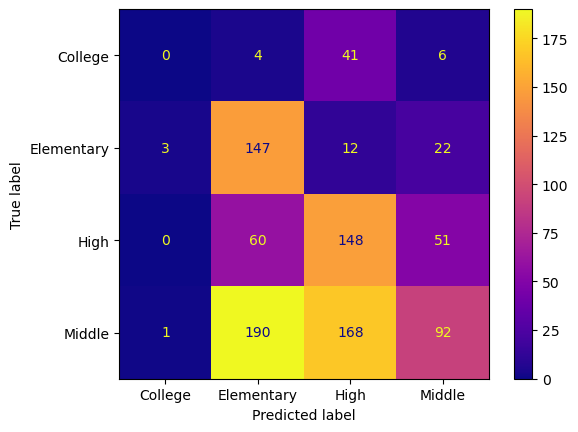

In [61]:
#Predictions
print("Test Score: {}".format(pipeline.score(X_test, y_test)))
print("Train Score: {}".format(pipeline.score(X_train, y_train)))

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap="plasma");

Looking at the two models above, the TfidfVectorizer seemed to do a much better job that the count vectorizer. For this reason, I will use TfidfVectorizer my remaining models.

### Target 1, Model 3
Now that I have established that the TfidfVectorizer() is the better vectorizer for my model, I will try a new model: MultinomialNB().

In [62]:
vect = TfidfVectorizer()
nb = MultinomialNB()
mm = MinMaxScaler()


#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline = Pipeline(steps = [('ct', ct), ('model', nb)])
    
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numericpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   MinMaxScaler())]),
                                                  ['WPS']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('vectorization',
                                                                   TfidfVectorizer())]),
                                                  'fully_normalized')])),
                ('model', MultinomialNB())])

Test Score: 0.48783068783068784
Train Score: 0.5575549087060069
              precision    recall  f1-score   support

     College       0.00      0.00      0.00        51
  Elementary       1.00      0.01      0.01       184
        High       0.54      0.05      0.10       259
      Middle       0.49      0.99      0.65       451

    accuracy                           0.49       945
   macro avg       0.51      0.26      0.19       945
weighted avg       0.57      0.49      0.34       945



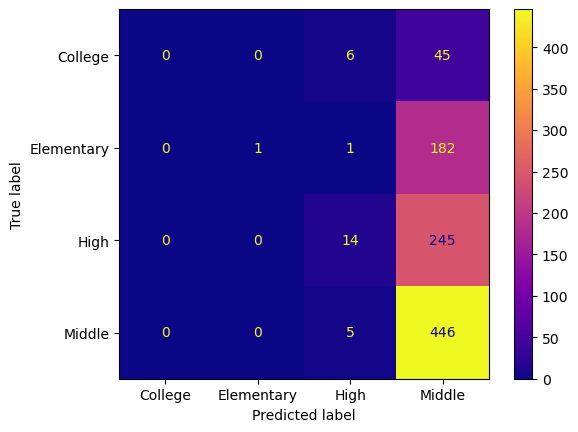

In [63]:
#Predictions
print("Test Score: {}".format(pipeline.score(X_test, y_test)))
print("Train Score: {}".format(pipeline.score(X_train, y_train)))

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap="plasma");

Looking at the three models above, my model had a difficult time correctly classifying text by readability, especially when for college level texts. I will now look at the second target (FRE Score) in the hopes that my test accurracy will improve.

### Train, Test, Split for Target 2

In [64]:
# below I am train, test, splitting the X and y values and then labeling encoding the y value
X2 = text
y2 = corpus['FRE_new']
y2 = y2.apply(lambda x: 0 if x == "Easy" else (1 if x == "Medium" else 2))

#label encoder
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)


### Target 2, Model 1 (complement nb without SMOTE/Resampling)

In [88]:
#Instantiating Models
vect = TfidfVectorizer()
compnb = ComplementNB()
mm = MinMaxScaler()

#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline2 = Pipeline(steps = [('ct', ct), ('model', compnb)])
  
pipeline_grid_1 = {
    'ct__nominalpipe__vectorization__ngram_range': [(1,1),(1,2),(2,2)],
    'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0] 
}

gs_pipeline2 = GridSearchCV(estimator= pipeline2, 
                       param_grid=pipeline_grid_1, scoring = "accuracy", cv = 5)

gs_pipeline2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          MinMaxScaler())]),
                                                                         ['WPS']),
                                                                        ('nominalpipe',
                                                                         Pipeline(steps=[('vectorization',
                                                                                          TfidfVectorizer())]),
                                                                         'fully_normalized')])),
                                       ('model', ComplementNB())]),
             param_grid={'ct__nominalpipe__vectorization__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (2,
                                                                          2)],
                         'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

In [91]:
print(gs_pipeline5.best_params_)


{'ct__nominalpipe__vectorization__ngram_range': (1, 1), 'model__alpha': 0.5}


Test Score: 0.7482369534555712
Train Score: 0.8841500302480338
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       913
           1       0.39      0.04      0.08       249
           2       0.58      0.74      0.65       256

    accuracy                           0.75      1418
   macro avg       0.59      0.58      0.53      1418
weighted avg       0.70      0.75      0.69      1418



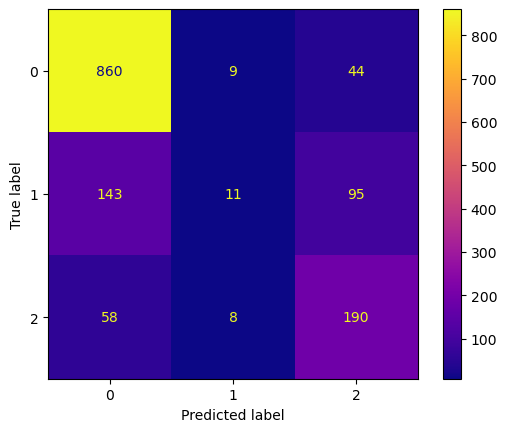

In [92]:
# Predictions
print("Test Score: {}".format(gs_pipeline2.score(X_test2, y_test2)))
print("Train Score: {}".format(gs_pipeline2.score(X_train2, y_train2)))

y_pred2 = gs_pipeline2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(gs_pipeline2, X_test2, y_test2, cmap="plasma");

### Target 2, Model 2 (complement nb with SMOTE/Resampling)

In [93]:
#Instantiating Models
vect = TfidfVectorizer()
compnb = ComplementNB()
mm = MinMaxScaler()
ros = RandomOverSampler()
rus = RandomUnderSampler()
sm = SMOTE(random_state=42)

#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    

pipeline2 = Pipeline(steps = [('ct', ct), ("smote", sm), ('model', compnb)])
  
pipeline_grid_1 = {
    'ct__nominalpipe__vectorization__ngram_range': [(1,1),(1,2),(2,2)],
    'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0] 
}

gs_pipeline2 = GridSearchCV(estimator= pipeline2, 
                       param_grid=pipeline_grid_1, scoring = "accuracy", cv = 5)

gs_pipeline2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          MinMaxScaler())]),
                                                                         ['WPS']),
                                                                        ('nominalpipe',
                                                                         Pipeline(steps=[('vectorization',
                                                                                          TfidfVectorizer())]),
                                                                         'fully_normalized')])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model', ComplementNB())]),
             param_grid={'ct__nominalpipe__vectorization__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (2,
                                                                          2)],
                         'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

In [96]:
print(gs_pipeline5.best_params_)


{'ct__nominalpipe__vectorization__ngram_range': (1, 1), 'model__alpha': 0.5}


Test Score: 0.7200282087447109
Train Score: 1.0
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       913
           1       0.33      0.17      0.22       249
           2       0.52      0.72      0.60       256

    accuracy                           0.72      1418
   macro avg       0.57      0.59      0.56      1418
weighted avg       0.70      0.72      0.70      1418



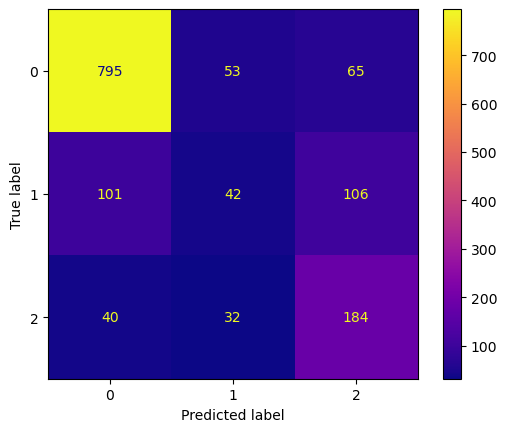

In [97]:
# Predictions
print("Test Score: {}".format(gs_pipeline2.score(X_test2, y_test2)))
print("Train Score: {}".format(gs_pipeline2.score(X_train2, y_train2)))

y_pred2 = gs_pipeline2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(gs_pipeline2, X_test2, y_test2, cmap="plasma");

I tried three different resampling techniques above include smote, undersampling and oversampling and they all reduced the test accuracy of my model. For this reason, I will not use smote in my model.

### Target 2, Model 3

In [98]:
#Instantiating Models
vect = TfidfVectorizer()
nb = MultinomialNB()
mm = MinMaxScaler()


#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline2 = Pipeline(steps = [('ct', ct), ('model', compnb)])
  
pipeline_grid_1 = {
    'ct__nominalpipe__vectorization__ngram_range': [(1,1),(1,2),(2,2)],
    'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0] 
}

gs_pipeline2 = GridSearchCV(estimator= pipeline2, 
                       param_grid=pipeline_grid_1, scoring = "accuracy", cv = 5)

gs_pipeline2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          MinMaxScaler())]),
                                                                         ['WPS']),
                                                                        ('nominalpipe',
                                                                         Pipeline(steps=[('vectorization',
                                                                                          TfidfVectorizer())]),
                                                                         'fully_normalized')])),
                                       ('model', ComplementNB())]),
             param_grid={'ct__nominalpipe__vectorization__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (2,
                                                                          2)],
                         'model__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

Test Score: 0.7482369534555712
Train Score: 0.8841500302480338
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       913
           1       0.39      0.04      0.08       249
           2       0.58      0.74      0.65       256

    accuracy                           0.75      1418
   macro avg       0.59      0.58      0.53      1418
weighted avg       0.70      0.75      0.69      1418



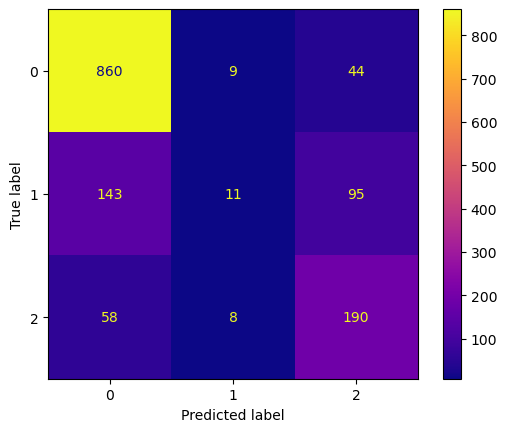

In [100]:
# Predictions
print("Test Score: {}".format(gs_pipeline2.score(X_test2, y_test2)))
print("Train Score: {}".format(gs_pipeline2.score(X_train2, y_train2)))

y_pred2 = gs_pipeline2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(gs_pipeline2, X_test2, y_test2, cmap="plasma");

All three of the models for target 2 that I have run so far are performing better than the models for target 1. The best target 1 model had a test accuracy of 53%, while these models have a test accuracy of 75%. I will now use target 2 to look at a few more models.

### Target 2, Model 4

In [121]:
#Instantiating Models
vect = TfidfVectorizer()
compnb = RandomForestClassifier(random_state= 42)
ss = StandardScaler()
mm = MinMaxScaler()
sm = SMOTE(random_state=42)


#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline2 = Pipeline(steps = [('ct', ct), ("smote", sm), ('model', compnb)])
  
pipeline_grid_1 = {
    'ct__nominalpipe__vectorization__ngram_range': [(1,1),(1,2),(2,2)],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 3, 5],
    'model__max_features': ['sqrt', 'log2', None] 
}

gs_pipeline2 = GridSearchCV(estimator= pipeline2, 
                       param_grid=pipeline_grid_1, scoring = "accuracy", cv = 5)

gs_pipeline2.fit(X_train2, y_train2)

In [ ]:
# Predictions
print("Test Score: {}".format(gs_pipeline2.score(X_test2, y_test2)))
print("Train Score: {}".format(gs_pipeline2.score(X_train2, y_train2)))

y_pred2 = gs_pipeline2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(gs_pipeline2, X_test2, y_test2, cmap="plasma");

### Target 2, Model 5

In [ ]:
#Instantiating Models
vect = TfidfVectorizer()
boost = XGBClassifier(random_state=42)
mm = MinMaxScaler()
sm = SMOTE(random_state=42)

#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline2 = Pipeline(steps = [('ct', ct), ("smote", sm), ('model', boost)])
  
pipeline_grid_1 = {
    'ct__nominalpipe__vectorization__ngram_range': [(1,1),(1,2),(2,2)],
    'model__learning_rate': [0.1, 0.2, 0.3, 1],
    'model__max_depth': [6, 8, 10],
    'model__n_estimators': [200, 300, 500, 1000]
}

gs_pipeline2 = GridSearchCV(estimator= pipeline2, 
                       param_grid=pipeline_grid_1, scoring = "accuracy", cv = 5)

gs_pipeline2.fit(X_train2, y_train2)

In [ ]:
print(gs_pipeline2.best_params_)


In [ ]:
# Predictions
print("Test Score: {}".format(gs_pipeline2.score(X_test2, y_test2)))
print("Train Score: {}".format(gs_pipeline2.score(X_train2, y_train2)))

y_pred2 = gs_pipeline2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(gs_pipeline2, X_test2, y_test2, cmap="plasma");

Despite being overfitted, 77% accuracy on the test is my best score. In addition, looking at the Confusion Matrix above, model 5 does the best job of correctly classifying the "medium" class. Therefore, I will choose target 2, model 5 as my best and final model

### FINAL MODEL

In [102]:
#Instantiating Models
vect = TfidfVectorizer(ngram_range = (1,1))
boost = XGBClassifier(learning_rate = 0.2, max_depth = 10, n_estimators = 300, random_state=42)
ss = StandardScaler()
mm = MinMaxScaler()




#Column Transformations
numeric_pipeline = Pipeline([('numnorm', mm)])
nominal_pipeline = Pipeline([('vectorization', vect)])


ct = ColumnTransformer([
    ("numericpipe", numeric_pipeline, ["WPS"]),
    ("nominalpipe", nominal_pipeline, "fully_normalized")], remainder = "passthrough")
    
pipeline_final = Pipeline(steps = [('ct', ct), ('model', boost)])
  

pipeline_final.fit(X_train2, y_train2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numericpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   MinMaxScaler())]),
                                                  ['WPS']),
                                                 ('nominalpipe',
                                                  Pipeline(steps=[('vectorization',
                                                                   TfidfVectorizer())]),
                                                  'fully_normalized')])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

Test Score: 0.771509167842031
Train Score: 1.0
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       913
           1       0.41      0.29      0.34       249
           2       0.71      0.63      0.67       256

    accuracy                           0.77      1418
   macro avg       0.66      0.62      0.63      1418
weighted avg       0.75      0.77      0.75      1418



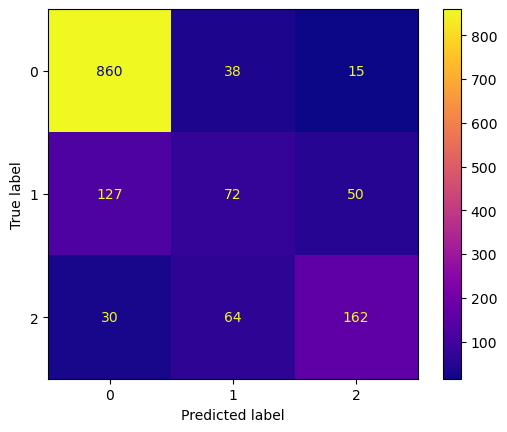

In [103]:
# Predictions
print("Test Score: {}".format(pipeline_final.score(X_test2, y_test2)))
print("Train Score: {}".format(pipeline_final.score(X_train2, y_train2)))

y_pred2 = pipeline_final.predict(X_test2)

print(classification_report(y_test2, y_pred2))

ConfusionMatrixDisplay.from_estimator(pipeline_final, X_test2, y_test2, cmap="plasma");

### Exploring TF-IDF Values in the Final Model

In [109]:
# first I want to create a dataframe of the vectorized words in the test data corpus
x2 = X_test2["fully_normalized"]
vect = TfidfVectorizer()
sparse = vect.fit_transform(x2)
df = pd.DataFrame(sparse.toarray(), columns=vect.get_feature_names_out(), index = x2.index)
df.head()

,001,03,10,100,1016,10th,120,127,13,13th,...,zooxanthellae,zum,zungmoro,zwijn,zymology,µc,½d,æneas,ætna,état
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#Next, I want to find the word with the highest tf-idf score in each row
series = []
for x in range(len(df)):
    top_words = df.iloc[x]
    top = top_words.sort_values(ascending=False)[:1]
    one = list(top.index)[0]
    series.append(one)

In [111]:
# I also want to find the highest tf-idf score in each row
series2 = []
for x in range(len(df)):
    top_words = df.iloc[x]
    top = top_words.sort_values(ascending=False)[:1]
    one = list(top)[0]
    series2.append(one)


In [112]:
#Here I am add four new columns to the dataframe
df["top word"] = series
df["top TFIDF"] = series2
df["pred class"] = y_pred2
df["real class"] = y_test2

In [113]:
#Sort the dataframe by tf-idf values
df_sort = df.sort_values('top TFIDF', ascending = False)

In [114]:
#showing the top 20 tf-idf scores for the words the were correctly classified as "easy"
eas = df_sort.loc[(df_sort["real class"] == 0)&(df_sort["pred class"] == 0)]
eas[0:20]

,001,03,10,100,1016,10th,120,127,13,13th,...,zymology,µc,½d,æneas,ætna,état,top word,top TFIDF,pred class,real class
1788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,shark,0.943979,0,0
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,marshmallow,0.871943,0,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,la,0.845107,0,0
1623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,sakima,0.812616,0,0
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,river,0.806969,0,0
1392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,sofia,0.794522,0,0
1192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,atieno,0.785551,0,0
1777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,bhabho,0.776993,0,0
1732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,ratshipi,0.767719,0,0
1610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,bo,0.766153,0,0


In [125]:
#showing the top 20 tf-idf scores for the words the were correctly classified as "medium"
med = df_sort.loc[(df_sort["real class"] == 1)&(df_sort["pred class"] == 1)]
med[0:20]


,001,03,10,100,1016,10th,120,127,13,13th,...,zymology,µc,½d,æneas,ætna,état,top word,top TFIDF,pred class,real class
1746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,color,0.702886,1,1
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,independence,0.687124,1,1
1119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,spacecraft,0.660090,1,1
1281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,tick,0.593439,1,1
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,inflammation,0.566404,1,1
1242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,puppet,0.546759,1,1
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,electric,0.538582,1,1
620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,brain,0.531630,1,1
3047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,wire,0.528712,1,1
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,history,0.523543,1,1


In [116]:
#showing the top 20 tf-idf scores for the words the were correctly classified as "hard"
hard = df_sort.loc[(df_sort["real class"] == 2)&(df_sort["pred class"] == 2)]
hard[0:20]

,001,03,10,100,1016,10th,120,127,13,13th,...,zymology,µc,½d,æneas,ætna,état,top word,top TFIDF,pred class,real class
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,solvent,0.772311,2,2
964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,attention,0.719513,2,2
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,carbohydrate,0.691668,2,2
2302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,consonant,0.670752,2,2
1061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,ant,0.668307,2,2
518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083157,0.0,0.0,0.0,0.0,0.0,fermentation,0.665255,2,2
2100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,signatory,0.662781,2,2
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,bacteria,0.656836,2,2
650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,lithosphere,0.652135,2,2
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,exercise,0.642961,2,2


### Model Coefficients

In [117]:
word = X_test2['fully_normalized']
word

227     honest poor old woman wash clothes pool bird h...
3049    plate illustrate residence mr. j. e. boehm a.r...
4638    wildebeest main grazers serengeti calanus grea...
2498    day become misty overcast heavy wet cloud hang...
1117    solvent substance become solution dissolve sol...
                              ...                        
4444    crowd car soon cannon street gate boy meet lit...
1786    mother giraffe work orange grove orange use to...
3499    piazza house wide—my fortune narrow build pano...
3614    sugar-cane vendor eye shrewdly gossip heard co...
121     begin long period perfect happiness mother son...
Name: fully_normalized, Length: 1418, dtype: object

In [118]:
feat_importances = pd.DataFrame(zip(df.columns, pipeline_final[1].feature_importances_)).sort_values(by = 1, ascending = False)

fi = feat_importances[0:5]

fi

,0,1
247,advocate,0.006488
10777,reduce,0.006249
7116,jekyll,0.006147
7949,magna,0.005449
8155,mayhem,0.005435


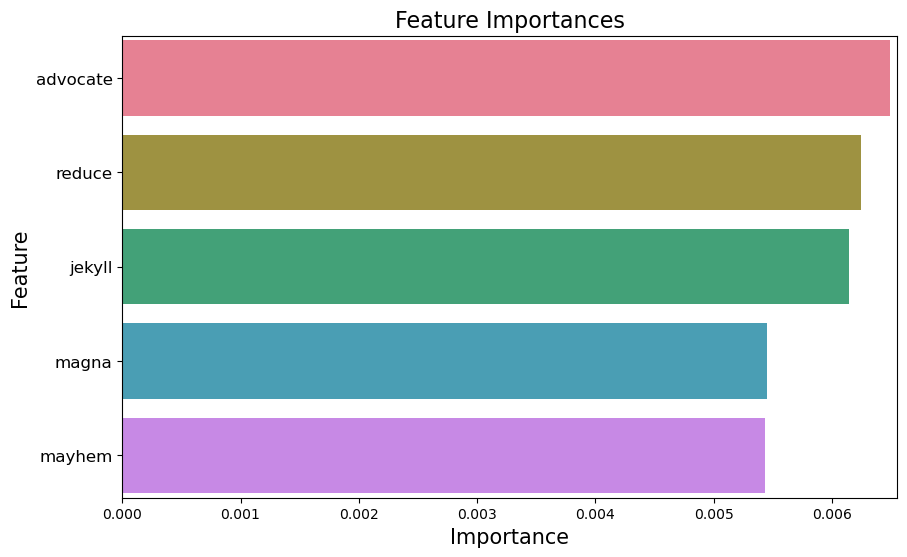

In [119]:
fi.columns = ['Feature', 'Importance']
fig, ax = plt.subplots(figsize=(10, 6))
sns.color_palette("husl", 8)
ax = sns.barplot(x='Importance', y='Feature', data=fi, palette="husl") #palette=palette
# ax.bar_label(ax.containers[0], padding=2)

ax.margins(y=0.01)
ax.margins(x=0.01)
plt.title("Feature Importances", size = 16)
plt.xlabel("Importance", size = 15)
plt.xticks(rotation=0)
plt.ylabel("Feature", size = 15)
plt.yticks(rotation=0, size=12)
plt.show()

### Conclusion

I would recommend that teachers EVENTUALLY use this model for the following:

1. Classify the readability of novel/new text
2. Get grade appropriate word recommendations for differentiating text


### Next Steps

In the next few days, I plan on implementing the following step in order to improve my model:

1. Scrape  more diverse texts to my corpus to better train my model especially for “Medium” texts. 
2. Feature engineer for authors and diagrams to add more “context” to my model
3. Find a better target for text readability scores
4. Run cosine similarity in order to create book recommendations

